## Machine Learning Algorithms applied to Divorce Data

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [2]:
# read data from csv file into pandas data frame
df = pd.read_csv("tree_feature_data.csv")
df.head()

,Atr17,Atr36,Atr37,Atr38,Atr40,Atr41,Class
0,0,1,2,1,3,2,1
1,4,2,3,4,4,2,1
2,3,1,2,1,3,3,1
3,3,1,3,3,4,2,1
4,1,0,0,0,1,0,1


### Linear Support Vector Classification

In [3]:
target = df["Class"]
target_names = ["Married", "Divorced"]

In [4]:
data = df.drop("Class", axis=1)
feature_names = data.columns
data.head()

,Atr17,Atr36,Atr37,Atr38,Atr40,Atr41
0,0,1,2,1,3,2
1,4,2,3,4,4,2
2,3,1,2,1,3,3
3,3,1,3,3,4,2
4,1,0,0,0,1,0


In [5]:
#Check if the data is equally balanced between the target classes
df['Class'].value_counts()

0    86
1    84
Name: Class, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, target)
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)


In [7]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
print('Test Acc: %.5f' % model.score(X_test, y_test))

Test Acc: 0.95349


In [9]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

     Married       0.91      1.00      0.95        20
    Divorced       1.00      0.91      0.95        23

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43



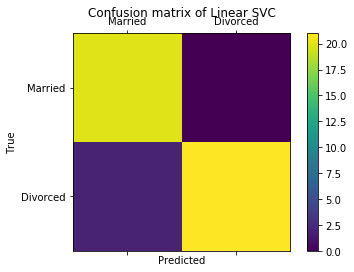

In [12]:
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of Linear SVC')
fig.colorbar(cax)
ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  20
False Positives:  0
False Negatives:  2
True Positives:  21
